In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
data = df.copy()
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [6]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [7]:
data.loc[data['Square'] < 18]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,NaN,3,9,B,412511.088764
1316,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,107604.269441
1608,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,137597.601458
1891,13685,0,1.0,17.498542,13.446544,0.0,7,5.0,1961,0.319809,B,B,25,4756,16,2857.0,5,8,B,88871.750230
3166,15127,150,1.0,17.046188,20.036232,8.0,7,12.0,1982,0.300323,B,B,52,10311,6,NaN,1,9,B,74222.110465
3280,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,NaN,0,1,B,97560.720383
3413,9487,5,1.0,5.129222,5.549458,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,369472.403061
4739,12676,81,3.0,13.784865,15.988889,7.0,4,5.0,1960,0.319809,B,B,25,4756,16,2857.0,5,8,B,78388.806186
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
4900,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,NaN,0,1,B,161379.067034


In [8]:
# Заменим значения, где площадь квартиры < 18 на 20
data.loc[data['Square'] < 18, ['Square']] = 20
data.loc[data['Square'] < 18]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [9]:
data.loc[data['Square'] == 20]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.0,20.0,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,NaN,3,9,B,412511.088764
1316,11526,27,1.0,20.0,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,107604.269441
1608,10202,6,1.0,20.0,4.604943,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,137597.601458
1891,13685,0,1.0,20.0,13.446544,0.0,7,5.0,1961,0.319809,B,B,25,4756,16,2857.0,5,8,B,88871.750230
3166,15127,150,1.0,20.0,20.036232,8.0,7,12.0,1982,0.300323,B,B,52,10311,6,NaN,1,9,B,74222.110465
3280,10527,27,1.0,20.0,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,NaN,0,1,B,97560.720383
3413,9487,5,1.0,20.0,5.549458,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,369472.403061
4739,12676,81,3.0,20.0,15.988889,7.0,4,5.0,1960,0.319809,B,B,25,4756,16,2857.0,5,8,B,78388.806186
4853,3224,27,0.0,20.0,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
4900,4504,27,3.0,20.0,5.610772,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,NaN,0,1,B,161379.067034


In [10]:
data.loc[data['Square'] < data['LifeSquare']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
28,8054,23,1.0,42.530043,43.967759,1.0,3,9.0,2014,0.034656,B,B,0,168,0,NaN,0,0,B,95338.198549
44,10521,38,3.0,104.211396,106.340403,0.0,20,0.0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
52,2301,1,2.0,61.400054,65.224603,0.0,17,22.0,2016,0.007122,B,B,1,264,0,NaN,0,1,B,199215.452229
123,8753,25,3.0,85.952306,89.803753,1.0,4,3.0,2017,0.069753,B,B,53,13670,4,NaN,1,11,B,309688.592681
153,9870,62,1.0,51.831473,53.491301,1.0,5,1.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,131797.472284
178,2416,57,1.0,29.298168,29.770784,5.0,7,5.0,1964,0.133215,B,B,49,11395,3,1406.0,3,4,A,148991.265200
184,3398,74,1.0,48.743665,51.011232,1.0,12,20.0,2017,0.075779,B,B,6,1437,3,NaN,0,2,B,165071.825722
212,1748,88,2.0,20.000000,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,NaN,3,9,B,412511.088764
217,5540,27,3.0,57.643613,59.425078,9.0,16,10.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,198351.892455
234,12633,27,3.0,81.867166,81.884548,0.0,12,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,182228.520030


In [11]:
data['HouseYear'].value_counts()

1977        2652
2017         308
2016         305
2015         299
2014         210
1970         194
1969         190
1972         178
1971         177
2018         175
1974         169
1968         162
1965         161
1963         158
1976         155
1973         150
1964         150
1975         150
1967         146
1966         140
1978         129
1962         125
1960         121
1961         113
1982         111
1981         108
1979         107
1980         107
2005         102
1983         101
            ... 
1952          10
1953          10
1931           7
1935           7
1950           7
1939           6
1918           5
1933           5
1937           5
1934           4
1938           4
1951           4
1940           4
1930           3
1942           3
1936           3
1919           3
1917           3
1912           2
1929           2
1932           2
1948           2
1941           2
4968           1
1914           1
1947           1
1916           1
1910          

# Вебинар №3 --------------------------------------------------------------------------

In [12]:
data = pd.read_csv('train.csv')
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [13]:
data.shape

(10000, 20)

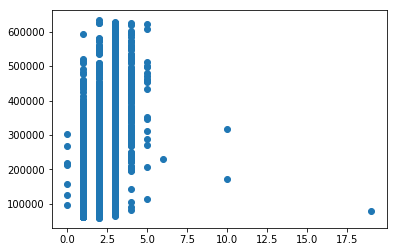

In [14]:
# Проверим гипотезу зависимости количества комнат и цены на квартиру
plt.scatter(data['Rooms'], data['Price'])

In [15]:
# Запоминаем индексы наблюдений, в которых количество комнат больше 9
# df_index = data.loc[data['Rooms']>9].index

In [16]:
# Удалим эти наблюдения
# data.drop(df_index, axis=0, inplace=True)

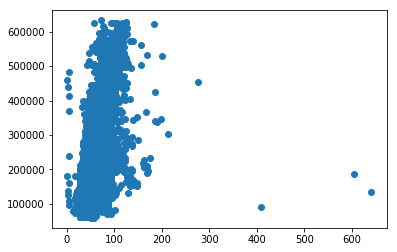

In [17]:
plt.scatter(data['Square'], data['Price'])

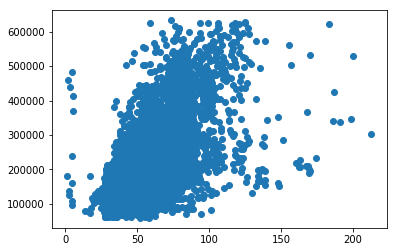

In [18]:
plt.scatter(data.loc[data['Square']<250, 'Square'],
           data.loc[data['Square']<250, 'Price'])

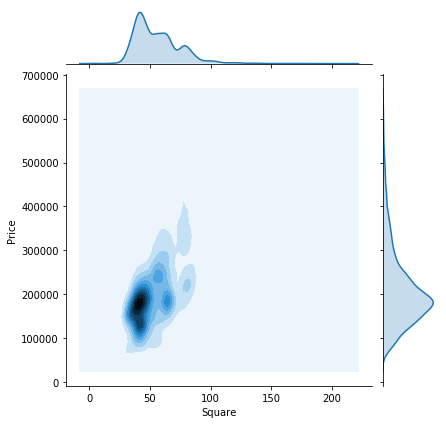

In [19]:
sns.jointplot(data.loc[data['Square']<250, 'Square'],
             data.loc[data['Square']<250, 'Price'], kind='kde')

In [20]:
shape_0_Rooms = data.loc[data['Rooms']==0, 'Price'].values.shape[0]

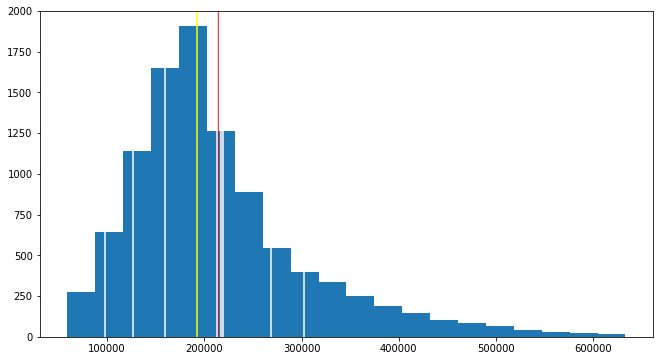

In [21]:
# 0-комнатные квартиры обозначены белыми линиями (8 квартир)

plt.figure(figsize=(11,6))
plt.hist(data['Price'], bins=20)
plt.axvline(x=data['Price'].mean(), color='red')
plt.axvline(x=data['Price'].median(), color='yellow')
for i in range(shape_0_Rooms):
    plt.axvline(x=data.loc[data['Rooms']==0,'Price'].values[i], color='white')

(array([ 274.,  643., 1143., 1649., 1906., 1262.,  889.,  545.,  396.,
         335.,  251.,  186.,  148.,  106.,   87.,   67.,   43.,   29.,
          23.,   18.]),
 array([ 59174.77802758,  87877.7124547 , 116580.64688182, 145283.58130894,
        173986.51573605, 202689.45016317, 231392.38459029, 260095.31901741,
        288798.25344453, 317501.18787165, 346204.12229876, 374907.05672588,
        403609.991153  , 432312.92558012, 461015.86000724, 489718.79443436,
        518421.72886147, 547124.66328859, 575827.59771571, 604530.53214283,
        633233.46656995]),
 <a list of 20 Patch objects>)

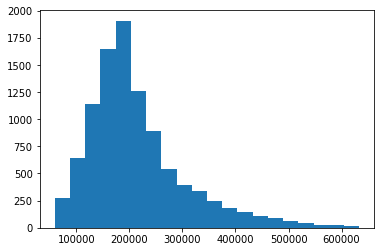

In [22]:
plt.hist(data['Price'], bins=20)

In [23]:
# Разберем, как строится гистограмма: находим минимальное и максимальное значение
ls = np.linspace(data['Price'].min(), data['Price'].max(), 21)
ls

array([ 59174.77802758,  87877.7124547 , 116580.64688182, 145283.58130894,
       173986.51573605, 202689.45016317, 231392.38459029, 260095.31901741,
       288798.25344453, 317501.18787165, 346204.12229876, 374907.05672588,
       403609.991153  , 432312.92558012, 461015.86000724, 489718.79443436,
       518421.72886147, 547124.66328859, 575827.59771571, 604530.53214283,
       633233.46656995])

In [24]:
qty_flat = []
for i in range(20):
    if i<19:
        qty_flat.append(data.loc[(ls[i] <= data['Price']) & (data['Price'] < ls[i+1]), :].shape[0])
    else:
        qty_flat.append(data.loc[(ls[i] <= data['Price']) & (data['Price'] <= ls[i+1]), :].shape[0])
np.array(qty_flat, dtype=np.float64)  

array([ 274.,  643., 1143., 1649., 1906., 1262.,  889.,  545.,  396.,
        335.,  251.,  186.,  148.,  106.,   87.,   67.,   43.,   29.,
         23.,   18.])

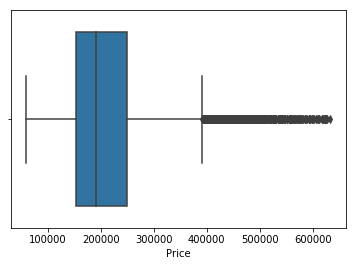

In [25]:
# Вертикальная черта - медиана (50-й перцентиль)
# Левая граница прямоугольника - 25-й пертцентиль (1-й квартиль)
# Правая граница прямоугольника - 75-й пертцентиль (3-й квартиль)
# Вертикальная палочка - статистически значимая выборка (обычно максимальное и минимальное значение)
# В случае, если выбросы существуют, интерквартильный размах (это метрика, которая показывает разнику между 
# 1-м и 3-м квартилем, полтора в одну и полтора в другую сторону от краев прямоугольника)
# Все, что за пределами палочек - выбросы

sns.boxplot(data['Price'])

In [26]:
data['Price'].describe()

count     10000.000000
mean     214138.857399
std       92872.293865
min       59174.778028
25%      153872.633942
50%      192269.644879
75%      249135.462171
max      633233.466570
Name: Price, dtype: float64

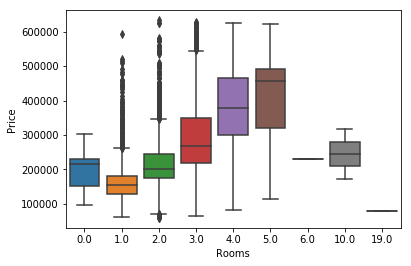

In [27]:
sns.boxplot(x=data['Rooms'], y=data['Price'])

In [28]:
# В 1 и 2-х комнатных квартирах много выбросов. Нужно их удалить, либо приравнять к медианному значению.
# И потом оценивать качество модели

#### dummy-переменные 

In [29]:
data.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [30]:
data['Ecology_2'].nunique()

2

In [31]:
data['Ecology_2'].unique()

array(['B', 'A'], dtype=object)

In [32]:
data['Ecology_3'].unique()

array(['B', 'A'], dtype=object)

In [33]:
# Мы не можем при построении моделей регрессии или классификации сравнивать буквенные значения с числами
# Нужно превратить в dummy-переменные
pd.options.display.max_columns=40
data = pd.get_dummies(data)
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,NaN,0,11,184966.930730,0,1,0,1,0,1
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,240.0,1,16,300009.450063,0,1,0,1,0,1
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,229.0,1,3,220925.908524,0,1,0,1,0,1
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,1084.0,0,5,175616.227217,0,1,0,1,0,1
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2078.0,2,4,150226.531644,0,1,0,1,0,1


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Price            10000 non-null float64
Ecology_2_A      10000 non-null uint8
Ecology_2_B      10000 non-null uint8
Ecology_3_A      10000 non-null uint8
Ecology_3_B      10000 non-null uint8
Shops_2_A        10000 non-null uint8
Shops_2_B        10000 non-null uint8
dtyp

In [35]:
data['DistrictId'].nunique()

205

In [36]:
data['DistrictId'].unique()

array([ 35,  41,  53,  58,  99,  59, 154,  74,   1,  23,  28,  31,  13,
        57,  27,  85,  34,  19,   0,  48,  54, 150,  11,  50,  61,  44,
        90, 200,  43, 177, 101,  38,  21, 103,  98, 170,  94,   5,  88,
        47,   6,  52,  62,  77,  79,   9, 156,  69, 108,  96, 169,  18,
       148, 128,  10, 144, 120,  39,   7,  84, 123, 159,  70, 129,   3,
        95,  78,  45,  15, 121,  49,  25,   2, 127,  56, 109,  46,  17,
       119,  80,  86,  83, 137,  91,  92, 118, 187,  36, 106, 161,  22,
        63, 167, 113,  66,  29,  37,  20,   8, 181,  40,  93,  30,  81,
       107, 130, 100,  12, 125,  67,  26,  89,  24, 111, 138,  64, 124,
       183,  55, 157, 151,  33,  87, 126, 155, 164, 105, 110, 132,  71,
        73, 189,  75, 122, 163, 141,  76, 115, 139, 143, 201, 165, 190,
       193, 174,  60, 114, 172, 134, 117, 149, 153, 131, 145,  82, 160,
        42,  32, 133, 208, 171, 176, 173, 147,  97, 142, 195, 180, 196,
       112,  72, 175,   4, 186, 146, 191, 168, 192,  14, 199, 13

In [37]:
data.loc[data['DistrictId']==149, 'Price'].mean()

226824.06670235342

In [38]:
data.loc[data['DistrictId']==173, 'Price'].mean()

306563.58882976335

In [39]:
# Нужно DistrictId сделать строковой, чтобы get_dummies восприняла ее как котегориальную
data['DistrictId'] = data['DistrictId'].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
Id               10000 non-null int64
DistrictId       10000 non-null object
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Price            10000 non-null float64
Ecology_2_A      10000 non-null uint8
Ecology_2_B      10000 non-null uint8
Ecology_3_A      10000 non-null uint8
Ecology_3_B      10000 non-null uint8
Shops_2_A        10000 non-null uint8
Shops_2_B        10000 non-null uint8
dty

In [40]:
# Теперь много District'ов
# С одной стороны разряженная лучше, чем плотная. С другой стороны, когда ограниченное количество наблюдений при
# при большем количестве признаков, модель может переобучаться или недообучаться
# Поэтому мы не будем пользоваться дамизацией

pd.get_dummies(data).head(20)

,Id,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,...,DistrictId_81,DistrictId_82,DistrictId_83,DistrictId_84,DistrictId_85,DistrictId_86,DistrictId_87,DistrictId_88,DistrictId_89,DistrictId_9,DistrictId_90,DistrictId_91,DistrictId_92,DistrictId_93,DistrictId_94,DistrictId_95,DistrictId_96,DistrictId_97,DistrictId_98,DistrictId_99
0,14038,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,NaN,0,11,184966.930730,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15053,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,240.0,1,16,300009.450063,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4765,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,229.0,1,3,220925.908524,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5809,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,1084.0,0,5,175616.227217,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10783,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2078.0,2,4,150226.531644,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,12915,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,35,7715,4,990.0,0,6,215898.447742,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,14549,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,20,4386,14,NaN,1,5,296021.204377,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,11993,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,6,1437,3,NaN,0,2,221244.156664,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,5172,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,1,264,0,NaN,0,1,229102.795999,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,8649,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,6,1437,3,NaN,0,2,95380.220993,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
# Пойдем другим путем - узнаем среднюю цену в каждом районе
data.groupby('DistrictId')[['Price']].mean()

,Price
DistrictId,
0,195295.590075
1,187805.401737
10,232476.676562
100,268783.768405
101,197604.026660
102,166626.871465
103,268865.145502
104,337688.412275
105,224550.835954


In [42]:
# Но средняя цена может ни о чем не говорить, так как какой-то район может оказаться спальным, а в нем много 
# 3-х и 4-х комнатных квартир, а они обычно дороже. Поэтому надо сгруппировать и по количеству комнат.

data.groupby(['DistrictId','Rooms'])[['Price']].mean().reset_index()

,DistrictId,Rooms,Price
0,0,1.0,141262.601991
1,0,2.0,197998.146681
2,0,3.0,304170.518823
3,1,1.0,147454.605358
4,1,2.0,198777.278269
5,1,3.0,246262.924161
6,1,4.0,277290.705058
7,1,19.0,78364.616704
8,10,1.0,170966.418015
9,10,2.0,226197.554021


In [43]:
# По-другому

data_stat1 = data.groupby(['DistrictId','Rooms'], as_index = False)[['Price']].mean().rename(columns={"Price":"mean_price"})

In [44]:
data = pd.merge(data, data_stat1,on=['DistrictId','Rooms'], how='left')

In [45]:
# Просмотрим корреляцию

data.loc[:, ['Price','mean_price']].corr()

,Price,mean_price
Price,1.000000,0.803103
mean_price,0.803103,1.000000


In [46]:
# Есть ли зависимость между площадью и жилой площадью


data.loc[:, ['Square','LifeSquare', 'KitchenSquare']].corr()

,Square,LifeSquare,KitchenSquare
Square,1.000000,0.196129,0.008320
LifeSquare,0.196129,1.000000,-0.001195
KitchenSquare,0.008320,-0.001195,1.000000


In [47]:
# Нет зависимости между Square и KitchenSquare, значит возможно есть много выбросов

# Вебинар №4 --------------------------------------------------------------------------

In [48]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
data = pd.read_csv('train.csv')

In [50]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [52]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [53]:
# Половины Healthcare_1 нет, поэтому удаляем

data.drop('Healthcare_1', axis = 1, inplace = True)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(7), int64(9), object(3)
memory usage: 1.4+ MB


In [55]:
data.shape

(10000, 19)

In [56]:
data['HouseYear'].describe()

count    1.000000e+04
mean     3.990166e+03
std      2.005003e+05
min      1.910000e+03
25%      1.974000e+03
50%      1.977000e+03
75%      2.001000e+03
max      2.005201e+07
Name: HouseYear, dtype: float64

In [57]:
data.loc[data['HouseYear']>2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,3,6,B,254084.534396
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,5,8,B,243028.603096


In [58]:
# Исправим выброс

data.loc[data['HouseYear']==20052011, 'HouseYear'] = 2008

In [59]:
data.loc[data['HouseYear']==4968, 'HouseYear'] = 1968

In [60]:
data['HouseYear'].describe()

count    10000.00000
mean      1984.86600
std         18.41187
min       1910.00000
25%       1974.00000
50%       1977.00000
75%       2001.00000
max       2020.00000
Name: HouseYear, dtype: float64

In [61]:
data.loc[data['Rooms']>6]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,5,15,B,317265.323792
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,0,1,B,78364.616704
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,2,4,B,172329.270863


In [62]:
# Устраняем выбросы

data.loc[data['Rooms']==10, 'Rooms'] = 2
data.loc[data['Rooms']==19, 'Rooms'] = 1

In [63]:
data.loc[data['Id'].isin([5927, 8491, 14865])]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,2.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,5,15,B,317265.323792
1454,8491,1,1.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,0,1,B,78364.616704
8849,14865,9,2.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,2,4,B,172329.270863


In [64]:
data['Price'].describe()

count     10000.000000
mean     214138.857399
std       92872.293865
min       59174.778028
25%      153872.633942
50%      192269.644879
75%      249135.462171
max      633233.466570
Name: Price, dtype: float64

In [65]:
index_arr1 = data.loc[(data['LifeSquare'] - data['Square'])>5].index

In [66]:
# Выведем, где жилая площадь значительно больше общей

data.loc[index_arr1, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,3,9,B,412511.088764
590,14990,23,2.0,48.449873,263.542020,5.0,6,5.0,1972,0.075779,B,B,6,1437,3,0,2,B,141780.231857
3280,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,0,1,B,97560.720383
4328,16550,27,3.0,81.694417,7480.592129,1.0,9,17.0,2016,0.017647,B,B,2,469,0,0,0,B,217357.492366
4638,4071,6,3.0,75.203314,82.486992,1.0,13,25.0,2015,0.243205,B,B,5,1564,0,0,0,B,211324.917957
6332,8961,27,1.0,33.398983,164.153360,6.0,3,5.0,1965,0.211401,B,B,9,1892,0,0,1,B,104891.073757
8030,13265,1,3.0,4.823679,79.767964,0.0,6,17.0,1977,0.007122,B,B,1,264,0,0,1,B,237716.681261
8437,15886,85,3.0,78.059331,461.463614,10.0,12,16.0,1998,0.037178,B,B,52,11217,1,1,7,B,394253.299978


In [67]:
# Напишем функцию, которая исправит выбросы

def prepare_square(df):
    df.loc[df['Square']>df['Rooms']*40+40, 'Square'] = df['Rooms']*40 + 40
    df.loc[df['Square']<df['Rooms']*15, 'Square'] = df['Rooms']*15
    #return df

In [68]:
data['Square'].describe()

count    10000.000000
mean        56.315775
std         21.058732
min          1.136859
25%         41.774881
50%         52.513310
75%         65.900625
max        641.065193
Name: Square, dtype: float64

In [69]:
prepare_square(data)
data['Square'].describe()

count    10000.000000
mean        56.060633
std         18.629678
min          2.377248
25%         41.780320
50%         52.509275
75%         65.894295
max        240.000000
Name: Square, dtype: float64

In [70]:
data.loc[(~data['Square'].between(30, 65))&(data['Rooms']==2), :].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,0,2,B,221244.156664
25,5073,74,2.0,82.667915,NaN,1.0,16,17.0,1977,0.075779,B,B,6,1437,3,0,2,B,244145.827069
61,4191,1,2.0,65.023899,NaN,1.0,10,17.0,1977,0.007122,B,B,1,264,0,0,1,B,197343.797985
70,10362,27,2.0,79.227049,NaN,0.0,9,0.0,1977,0.072158,B,B,2,629,1,0,0,A,167023.973143
71,2136,74,2.0,84.687732,81.905552,0.0,12,17.0,2017,0.075779,B,B,6,1437,3,0,2,B,243479.876105


In [71]:
# Если LifeSquare - NAN, заменим на общую
# Здесь надо сделать поумнее

def prepare_lifesquare(df):
    df.loc[df['Square']<df['LifeSquare'], 'LifeSquare'] =df['Square']

In [72]:
prepare_lifesquare(data)

In [73]:
def fillna_life_square(df, source_df):
    df['LifeSquare'] = df['LifeSquare'].fillna(source_df['LifeSquare'].mean())

In [74]:
fillna_life_square(data, data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(7), int64(9), object(3)
memory usage: 1.4+ MB


#### Подготовку произвели, дальше регрессия 

In [75]:
from sklearn.model_selection import train_test_split
target = data['Price']
features = data[['Rooms', 'Square', 'LifeSquare']]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)

In [77]:
# Линейная регрессия

from sklearn.linear_model import LinearRegression as LR
from sklearn.ensemble import RandomForestRegressor as RF

In [78]:
model1 = LR()

In [79]:
model1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [80]:
y_pred = model1.predict(X_test)

In [81]:
from sklearn.metrics import r2_score as r2, mean_squared_error as mse

In [82]:
r2(y_test, y_pred)

0.3658022487982052

In [83]:
mse(y_test, y_pred)

5455213677.680633

#### Случайный лес 

In [84]:
model2 = RF(n_estimators=120, max_depth=8, min_samples_leaf=3)

In [85]:
RF?

In [86]:
model2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [87]:
y_pred_2 = model2.predict(X_test)

In [88]:
r2(y_test, y_pred_2)

0.4525849003452065

In [89]:
mse(y_test, y_pred_2)

4708730570.783022

#### Порядок действий в курсаче 

In [90]:
test=pd.read_csv('test.csv')

In [91]:
prepare_square(test)

In [92]:
prepare_lifesquare(test)

In [93]:
fillna_life_square(test, data)

In [94]:
test1 = test[['Id','Rooms','Square','LifeSquare']]

In [95]:
test1.head()

,Id,Rooms,Square,LifeSquare
0,725,2.0,49.882643,33.432782
1,15856,2.0,69.263183,35.862177
2,5480,1.0,15.000000,15.000000
3,15664,2.0,73.046609,51.940842
4,14275,1.0,47.527111,43.387569


In [96]:
y_pred_test = model2.predict(test[['Rooms','Square','LifeSquare']])

In [97]:
result = pd.concat([test1['Id'], pd.Series(y_pred_test)], axis=1).rename(columns={0:'Price'})

In [98]:
result.to_csv('DFedorov_predictions.csv', index = None)

In [99]:
# Блокнот тоже высылать

In [100]:
# Можно еще добавить метод без учителя

# Вебинар 5

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
plt.style.use('fivethirtyeight')

In [102]:
data=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [103]:
# Проведем кластеризацию по двум признакам (год постройки дома и цена)

In [104]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [105]:
data.loc[data['HouseYear']==20052011, 'HouseYear'] = 2008
data.loc[data['HouseYear']==4968, 'HouseYear'] = 1968

In [106]:
train, valid = train_test_split(data, test_size=0.3, random_state=42)

In [107]:
train.shape, valid.shape

((7000, 20), (3000, 20))

In [108]:
scaler = MinMaxScaler()

In [109]:
train_scaled = scaler.fit_transform(train.loc[:,['HouseYear','Price']])
train_scaled

array([[0.9537037 , 0.05160481],
       [0.60185185, 0.26010927],
       [0.68518519, 0.2163305 ],
       ...,
       [0.60185185, 0.34473041],
       [0.56481481, 0.21652363],
       [0.75      , 0.67597523]])

In [110]:
# Надо понять, на сколько кластеров мы хотим разбить HouseYear. Именно HouseYear, так как Price - целевая переменная
from sklearn.cluster import AgglomerativeClustering

inertia_arr=[]
for i in range(2, 10):
    temp_model = KMeans(n_clusters=i, random_state=100)
    temp_model.fit(train_scaled)
    temp_inertia = temp_model.inertia_
    print(temp_inertia)
    inertia_arr.append(temp_inertia)

225.46454499391513
135.0556571036248
105.55772918874108
86.16288510705587
73.00245410902441
62.63449751551075
54.51530838164676
48.42185009504948


In [111]:
# Чем меньше значение, тем меньше разброс от центра кластера

Text(0.5, 1.0, 'INERTIA')

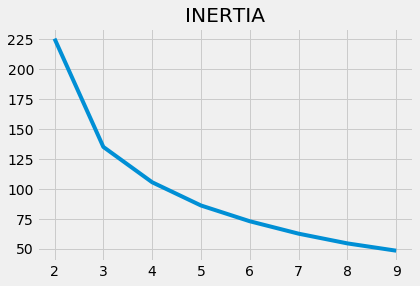

In [112]:
plt.plot([i for i in range (2, 10)], inertia_arr)
plt.title('INERTIA')

In [113]:
# Предполагаем, что на 4 кластерах достигнем наибольшего результата

In [114]:
from sklearn.cluster import AgglomerativeClustering

In [115]:
model = AgglomerativeClustering(n_clusters = 4)
# model = KMeans(n_clusters=4, random_state=100)

In [116]:
train['cluster_year'] = model.fit_predict(train_scaled)

Text(0.5, 1.0, 'Train')

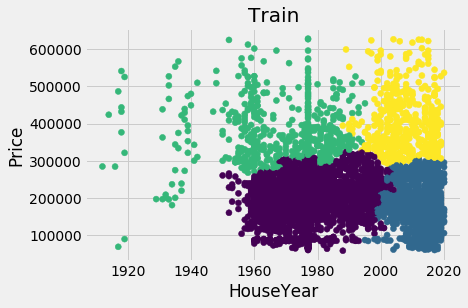

In [117]:
plt.scatter(train['HouseYear'], train['Price'], c = train['cluster_year'])
plt.xlabel('HouseYear')
plt.ylabel('Price')
plt.title('Train')

In [118]:
# В таблице появился cluster_year

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 9069 to 7270
Data columns (total 21 columns):
Id               7000 non-null int64
DistrictId       7000 non-null int64
Rooms            7000 non-null float64
Square           7000 non-null float64
LifeSquare       5514 non-null float64
KitchenSquare    7000 non-null float64
Floor            7000 non-null int64
HouseFloor       7000 non-null float64
HouseYear        7000 non-null int64
Ecology_1        7000 non-null float64
Ecology_2        7000 non-null object
Ecology_3        7000 non-null object
Social_1         7000 non-null int64
Social_2         7000 non-null int64
Social_3         7000 non-null int64
Healthcare_1     3642 non-null float64
Helthcare_2      7000 non-null int64
Shops_1          7000 non-null int64
Shops_2          7000 non-null object
Price            7000 non-null float64
cluster_year     7000 non-null int64
dtypes: float64(8), int64(10), object(3)
memory usage: 1.2+ MB


In [119]:
# Для того, чтобы это поле появилось и в тестовой или в валидационной выборке, нужно обучить модель классификации
# используем KNeighborsClassifier, так как он быстрый и простой

In [120]:
from sklearn.neighbors import KNeighborsClassifier

In [121]:
knn = KNeighborsClassifier(n_neighbors=4)

In [122]:
knn.fit(train_scaled, train['cluster_year'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [123]:
# Преобразуем валидационную выборку

valid_scaled = scaler.transform(valid.loc[:, ['HouseYear', 'Price']])

In [124]:
# Добавим поле

valid['cluster_year'] = knn.predict(valid_scaled)

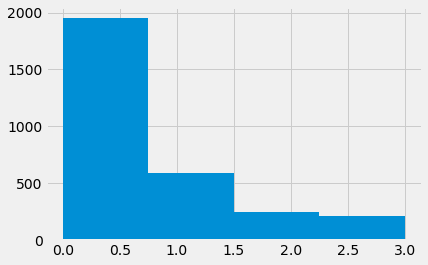

In [125]:
valid['cluster_year'].hist(bins=4)

In [126]:
# Мы создали cluster_year на valid и тренировочной выборке

In [127]:
# Обработаем District_Id

distr_info1 = train['DistrictId'].value_counts().reset_index().\
    rename(columns={'index':'DistrictId','DistrictId':'large_district'})

In [128]:
distr_info1.head(15)

,DistrictId,large_district
0,27,574
1,1,466
2,23,394
3,6,355
4,9,222
5,62,175
6,30,160
7,53,133
8,58,118
9,21,107


In [129]:
# Это топ районов с наибольшем количеством выставленных квартир на продажу. Сделаем гипотезу, что в этих районах
# цены должны быть ниже, так как предложение высокое

In [130]:
# Создадим еще одну переменную, она будет равна 1, если число предложений больше 100

In [131]:
distr_info1['is_large'] = (distr_info1['large_district'] > 100).astype(int)

In [132]:
distr_info1

,DistrictId,large_district,is_large
0,27,574,1
1,1,466,1
2,23,394,1
3,6,355,1
4,9,222,1
5,62,175,1
6,30,160,1
7,53,133,1
8,58,118,1
9,21,107,1


In [133]:
distr_info1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 3 columns):
DistrictId        202 non-null int64
large_district    202 non-null int64
is_large          202 non-null int32
dtypes: int32(1), int64(2)
memory usage: 4.0 KB


In [134]:
# Чтобы объединить датафреймы, напишем функцию
# left - потому что из левого датафрейма нельзя потерять значения

def add_distr_info(df, distr_info1):
    df = pd.merge(df, distr_info1, on='DistrictId', how='left')
    df['is_large'] = df['is_large'].fillna(0)
    df['large_district'] = df['large_district'].fillna(1)
    return df

In [135]:
# Добавим признак - средняя цена на комнату

price = train['Price'].mean()
price_mean_by_rooms=train.groupby(['Rooms'], as_index=False).agg({'Price':'mean'}).\
        rename(columns={'Price':'mean_price_by_rooms'})
price_mean_by_distr_rooms=train.groupby(['DistrictId','Rooms'], as_index=False).agg({'Price':'mean'}).\
        rename(columns={'Price':'mean_price_dr'})

In [136]:
price_mean_by_rooms

,Rooms,mean_price_by_rooms
0,0.0,184599.160110
1,1.0,160134.810901
2,2.0,215287.628931
3,3.0,290867.452543
4,4.0,385776.526291
5,5.0,386743.536446
6,6.0,229661.964416
7,10.0,317265.323792
8,19.0,78364.616704


In [137]:
price_mean_by_distr_rooms.head()

,DistrictId,Rooms,mean_price_dr
0,0,1.0,145789.889600
1,0,2.0,198451.332808
2,0,3.0,291670.749162
3,1,1.0,147116.367405
4,1,2.0,198775.648383


In [138]:
# Если не будет значения по району в тестовой или валидационной выборке, мы заполним значение средним по комнате.
# Если и этого нет, то заполним значением price

In [139]:
def add_mean_price(df, price_mean_by_distr_rooms, price_mean_by_rooms, price):
    df=pd.merge(df, price_mean_by_distr_rooms, on=['DistrictId', 'Rooms'], how='left')
    df=pd.merge(df, price_mean_by_rooms, on='Rooms', how='left')
    df['mean_price_dr']=df['mean_price_dr'].fillna(df['mean_price_by_rooms'])
    df['mean_price_dr']=df['mean_price_dr'].fillna(price)
    df['mean_price_by_rooms']=df['mean_price_by_rooms'].fillna(price)
    return df

In [140]:
# Теперь у нас есть 2 функции, которые добавляют среднюю цену по дистрикту и по дистрикту и по комнате
# также есть 2 переменные is_large и large_district

In [141]:
def prepare_data(df, distr_info1, price_mean_by_distr_rooms, price_mean_by_rooms, price):
    df = add_distr_info(df, distr_info1)
    df = add_mean_price(df, price_mean_by_distr_rooms, price_mean_by_rooms, price)
    return df

In [142]:
# cluster_year надо преобразовать в дами-переменные

def dummies(df, cluster_year='cluster_year'):
    df[cluster_year]=df[cluster_year].astype(object)
    df = pd.get_dummies(df)
    return df

In [143]:
train = prepare_data(train, distr_info1, price_mean_by_distr_rooms, price_mean_by_rooms, price)

In [144]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 0 to 6999
Data columns (total 25 columns):
Id                     7000 non-null int64
DistrictId             7000 non-null int64
Rooms                  7000 non-null float64
Square                 7000 non-null float64
LifeSquare             5514 non-null float64
KitchenSquare          7000 non-null float64
Floor                  7000 non-null int64
HouseFloor             7000 non-null float64
HouseYear              7000 non-null int64
Ecology_1              7000 non-null float64
Ecology_2              7000 non-null object
Ecology_3              7000 non-null object
Social_1               7000 non-null int64
Social_2               7000 non-null int64
Social_3               7000 non-null int64
Healthcare_1           3642 non-null float64
Helthcare_2            7000 non-null int64
Shops_1                7000 non-null int64
Shops_2                7000 non-null object
Price                  7000 non-null float64
cluster_year  

In [145]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,cluster_year,large_district,is_large,mean_price_dr,mean_price_by_rooms
0,14604,23,1.0,41.681380,22.796166,8.0,14,17.0,2015,0.075779,B,B,6,1437,3,NaN,0,2,B,88504.384965,1,394,1,102427.030975,160134.810901
1,5621,23,3.0,163.495333,161.504222,12.0,5,3.0,1977,0.014073,B,B,2,475,0,NaN,0,0,B,207007.956663,0,394,1,165911.129700,290867.452543
2,235,87,1.0,39.710131,19.538663,8.0,4,17.0,1986,0.100456,B,B,43,7227,0,NaN,1,6,A,182126.280899,0,21,0,169596.630515,160134.810901
3,16258,48,3.0,96.056784,98.152802,1.0,15,1.0,2017,0.041125,B,B,46,9515,5,NaN,1,10,B,524365.550705,3,62,0,382424.639356,290867.452543
4,10773,77,3.0,79.195825,44.421062,10.0,16,17.0,1984,0.298205,B,B,16,4048,3,NaN,1,3,B,322048.433990,2,28,0,251751.766701,290867.452543


In [146]:
train = dummies(train)

In [147]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,large_district,is_large,mean_price_dr,mean_price_by_rooms,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,cluster_year_0,cluster_year_1,cluster_year_2,cluster_year_3
0,14604,23,1.0,41.681380,22.796166,8.0,14,17.0,2015,0.075779,6,1437,3,NaN,0,2,88504.384965,394,1,102427.030975,160134.810901,0,1,0,1,0,1,0,1,0,0
1,5621,23,3.0,163.495333,161.504222,12.0,5,3.0,1977,0.014073,2,475,0,NaN,0,0,207007.956663,394,1,165911.129700,290867.452543,0,1,0,1,0,1,1,0,0,0
2,235,87,1.0,39.710131,19.538663,8.0,4,17.0,1986,0.100456,43,7227,0,NaN,1,6,182126.280899,21,0,169596.630515,160134.810901,0,1,0,1,1,0,1,0,0,0
3,16258,48,3.0,96.056784,98.152802,1.0,15,1.0,2017,0.041125,46,9515,5,NaN,1,10,524365.550705,62,0,382424.639356,290867.452543,0,1,0,1,0,1,0,0,0,1
4,10773,77,3.0,79.195825,44.421062,10.0,16,17.0,1984,0.298205,16,4048,3,NaN,1,3,322048.433990,28,0,251751.766701,290867.452543,0,1,0,1,0,1,0,0,1,0


In [148]:
# Выберем колонки для дальнейшего обучения регрессии

train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Price',
       'large_district', 'is_large', 'mean_price_dr', 'mean_price_by_rooms',
       'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A',
       'Shops_2_B', 'cluster_year_0', 'cluster_year_1', 'cluster_year_2',
       'cluster_year_3'],
      dtype='object')

In [149]:
feats = ['cluster_year_0', 'cluster_year_1', 'cluster_year_2',
       'cluster_year_3', 'large_district', 'is_large', 'mean_price_dr', 'mean_price_by_rooms']

In [150]:
model = RF(n_estimators = 40, max_depth = 10, random_state = 42)

In [151]:
model.fit(train.loc[:, feats], train['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [152]:
# То есть мы прикрутили новые фичи cluster_year, large_district, is_large, mean_price_dr, mean_price_by_rooms
# Они будут влиять на итоговую целевую функцию Price

In [153]:
# Делаем то же самое для valid

In [154]:
valid1 = prepare_data(valid, distr_info1, price_mean_by_distr_rooms, price_mean_by_rooms, price)

In [155]:
valid1 = dummies(valid1)

In [156]:
valid1.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,large_district,is_large,mean_price_dr,mean_price_by_rooms,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,cluster_year_0,cluster_year_1,cluster_year_2,cluster_year_3
0,3702,21,2.0,48.812195,34.679779,5.0,5,5.0,1963,0.034331,25,5487,3,NaN,0,4,181530.459031,107.0,1.0,189591.187596,215287.628931,0,1,0,1,0,1,1,0,0,0
1,12848,61,3.0,81.103039,49.310278,8.0,4,4.0,1960,0.298205,16,4048,3,NaN,1,3,260456.004692,85.0,0.0,293153.148921,290867.452543,0,1,0,1,0,1,1,0,0,0
2,2239,6,3.0,82.882978,3.977650,1.0,8,17.0,1977,0.243205,5,1564,0,540.0,0,0,219945.304640,355.0,1.0,212694.797384,290867.452543,0,1,0,1,0,1,1,0,0,0
3,15611,23,1.0,33.863324,29.993297,0.0,5,4.0,1977,0.034656,0,168,0,NaN,0,0,66883.280318,394.0,1.0,102427.030975,160134.810901,0,1,0,1,0,1,1,0,0,0
4,5634,52,1.0,43.095135,NaN,1.0,10,17.0,1977,0.371149,34,7065,1,750.0,2,5,114086.065201,96.0,0.0,135270.547115,160134.810901,0,1,0,1,0,1,1,0,0,0


In [157]:
from sklearn.ensemble import RandomForestRegressor as RF

In [158]:
y_pred = model.predict(valid1.loc[:, feats])

In [159]:
from sklearn.metrics import r2_score as r2

In [160]:
r2(valid['Price'], y_pred)

0.7481484996226793

In [161]:
# Надо повысить точность (оспользовать больше показателей)

In [162]:
# Точность на тренировочных данных

r2(train['Price'], model.predict(train.loc[:, feats]))

0.8489034788338743

### Ниже придставлено то, как должно быть в курсаче 

In [163]:
# То есть присутствует переобучение

In [164]:
# На тестовых данных цены нет, поэтому мы не сможем пресказывать по цене Price
# Для кластеризации нам надо будет использовать только те значения, которые есть во всех трех выборках
# на тесте, валиде и трейне
# для кластеризации нужно использовать house_year и district например, никак не price, т.к. в тестовой выборке
# цены нет, и мы не сможем определить в каком кластере находится элемент
# с использованием house_year и district мы поймем в каком районе находятся более старые дома и т.д.

In [165]:
# сделаем правильное предсказание (без использования price)

In [166]:
# Уберем кластеры, так как они создавались на основе Price и посчитаем значения на синтезированных фичах

feats = ['large_district', 'is_large', 'mean_price_dr', 'mean_price_by_rooms']

In [167]:
model = RF(n_estimators = 40, max_depth = 10, random_state = 42)

In [168]:
model.fit(train.loc[:, feats], train['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [169]:
valid1 = prepare_data(valid, distr_info1, price_mean_by_distr_rooms, price_mean_by_rooms, price)

In [170]:
from sklearn.ensemble import RandomForestRegressor as RF

In [171]:
y_pred = model.predict(valid1.loc[:, feats])

In [172]:
from sklearn.metrics import r2_score as r2

In [173]:
# На основании 4 признаков feats построили модель

r2(valid['Price'], y_pred)

0.5187378184420381

In [174]:
# Точность на тренировочных данных

r2(train['Price'], model.predict(train.loc[:, feats]))

0.6630506444688455

### Вот это уже пойдет в итог

In [175]:
# То же самое можем сделать с тестовой выборкой

test = add_distr_info(test, distr_info1)
test = add_mean_price(test, price_mean_by_distr_rooms, price_mean_by_rooms, price)

In [176]:
# Создадим новый признак

test['Price'] = model.predict(test.loc[:, feats])

In [177]:
# Этот датафрейм надо выслать преподавателю

test.loc[:, ['Id', 'Price']].head()

,Id,Price
0,725,171004.617958
1,15856,241183.524816
2,5480,159943.908894
3,15664,200822.945243
4,14275,123662.588545


In [178]:
# Высылается как файл

test.loc[:, ['Id', 'Price']].to_csv('DFedorov_predictions.csv', index=None)